# Analysis examples for DANRA reanalysis in zarr storage format

*Updated: 2025-01-21, Leif Denby (lcd@dmi.dk)*

This notebook demonstrates how to analyse the DANRA reanalysis data in zarr. The full DANRA data-collection is grouped in three parts, with data on: 1) height-levels, 2) pressure-levels and 3) single-levels (e.g. Earth's surface, top-of-atmosphere, column-integral properties)

In [1]:
from pathlib import Path

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
version = "v0.5.0"
# path to copies of processed DANRA datasets on scale.dmi.dk:
fp_root = Path(f"/dmidata/projects/cloudphysics/danra/data/{version}")
# path on ohm.dmi.dk where the files where processed:
# fp_root = Path(f"/vf/danra/data/{version}")

In [3]:
# lets have a quick look at the files of the dataset
!ls -l {fp_root}

total 428244
-rw-rw-r--  1 lcd g_file_cloudphysics      6872 Sep 24 17:37 20240924T173716.289215.log
-rw-rw-r--  1 lcd g_file_cloudphysics  13551954 Sep 24 17:59 20240924T173829.191466.log
-rw-rw-r--  1 lcd g_file_cloudphysics 424885357 Sep 29 06:35 20240924T180101.925896.log
drwxrwsr-x 13 lcd g_file_cloudphysics      4096 Jan 10 02:48 height_levels.zarr
drwxrwsr-x 17 lcd g_file_cloudphysics      4096 Dec 28 00:40 pressure_levels.zarr
-rw-rw-r--  1 lcd g_file_cloudphysics     20987 Jan 21 16:08 README.html
-rw-rw-r--  1 lcd g_file_cloudphysics      6304 Jan 21 16:08 README.md
drwxrwsr-x 38 lcd g_file_cloudphysics      4096 Jan 21 13:00 single_levels.zarr
drwxrwsr-x  3 lcd g_file_cloudphysics      4096 Jan 21 15:37 static_fields.zarr


In [5]:
# we'll start by rendering the content of the README.md file inline here
import IPython.display as display

fp_readme = fp_root / "README.md"
with open(fp_readme, "r") as f:
    readme = f.read()
display.display(display.Markdown(readme))

# DANRA reanalysis Zarr data collection

**v0.5.0, created 2025-01-21T16:10:26**

time-span: 1990-09-01T00:00Z to 2024-01-01T00:00Z

> All prognostic variables for 1990-09-01T00:00Z to 2024-01-01T00:00Z on all levels

## static fields

filename: `static_fields.zarr`

## height levels

filename: `height_levels.zarr`

|                                            | 30 [m]   | 50 [m]   | 75 [m]   | 100 [m]   | 150 [m]   | 200 [m]   | 250 [m]   | 300 [m]   | 500 [m]   |
|:-------------------------------------------|:---------|:---------|:---------|:----------|:----------|:----------|:----------|:----------|:----------|
| <abbr title='Relative humidity'>r</abbr>   | ✓        | ✓        | ✓        | ✓         | ✓         | ✓         | ✓         | ✓         | ✓         |
| <abbr title='Temperature'>t</abbr>         | ✓        | ✓        | ✓        | ✓         | ✓         | ✓         | ✓         | ✓         | ✓         |
| <abbr title='u-component of wind'>u</abbr> | ✓        | ✓        | ✓        | ✓         | ✓         | ✓         | ✓         | ✓         | ✓         |
| <abbr title='v-component of wind'>v</abbr> | ✓        | ✓        | ✓        | ✓         | ✓         | ✓         | ✓         | ✓         | ✓         |

## pressure levels

filename: `pressure_levels.zarr`

|                                            | 1000 [hPa]   | 950 [hPa]   | 925 [hPa]   | 900 [hPa]   | 850 [hPa]   | 800 [hPa]   | 700 [hPa]   | 600 [hPa]   | 500 [hPa]   | 400 [hPa]   | 300 [hPa]   | 250 [hPa]   | 200 [hPa]   | 100 [hPa]   |
|:-------------------------------------------|:-------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|
| <abbr title='Cloud ice'>ciwc</abbr>        | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='Cloud water'>cwat</abbr>      | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='Relative humidity'>r</abbr>   | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='Temperature'>t</abbr>         | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='Vertical velocity'>tw</abbr>  | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='u-component of wind'>u</abbr> | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='v-component of wind'>v</abbr> | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |
| <abbr title='Geopotential'>z</abbr>        | ✓            | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           | ✓           |

## single levels

filename: `single_levels.zarr`

<abbr title='Land cover (1=land, 0=sea)'>lsm</abbr>, <abbr title='Geopotential'>orography</abbr>, <abbr title='CAPE out of the model'>cape_column</abbr>, <abbr title='Cloud base'>cb_column</abbr>, <abbr title='Cloud top'>ct_column</abbr>, <abbr title='Graupel'>grpl_column</abbr>, <abbr title='High cloud cover'>hcc0m</abbr>, <abbr title='Icing index'>icei0m</abbr>, <abbr title='Low cloud cover'>lcc0m</abbr>, <abbr title='Long-wave radiation flux'>lwavr0m</abbr>, <abbr title='Medium cloud cover'>mcc0m</abbr>, <abbr title='Mixed layer depth'>mld0m</abbr>, <abbr title='Pressure'>pres0m</abbr>, <abbr title='Pressure'>pres_seasurface</abbr>, <abbr title='Precipitation Type'>prtp0m</abbr>, <abbr title='Pseudo satellite image: cloud top temperature (infrared)'>psct0m</abbr>, <abbr title='Pseudo satellite image: cloud water reflectivity (visible)'>pscw0m</abbr>, <abbr title='Pseudo satellite image: water vapour Tb'>pstb0m</abbr>, <abbr title='Pseudo satellite image: water vapour Tb + correction for clouds'>pstbc0m</abbr>, <abbr title='Precipitable water'>pwat_column</abbr>, <abbr title='Water equivalent of accumulated snow depth'>sf0m</abbr>, <abbr title='Short-wave radiation flux'>swavr0m</abbr>, <abbr title='Temperature'>t0m</abbr>, <abbr title='Total cloud cover'>tcc0m</abbr>, <abbr title='Visibility'>vis0m</abbr>, <abbr title='AROME hail diagnostic'>xhail0m</abbr>, <abbr title='Relative humidity'>r2m</abbr>, <abbr title='Temperature'>t2m</abbr>, <abbr title='u-component of wind'>u10m</abbr>, <abbr title='v-component of wind'>v10m</abbr>

<pre>
INSTALLED VERSIONS
------------------
commit: a84bd5dfa6f551e70d6d5a7a6647485a91e81f90
python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
python-bits: 64
OS: Linux
OS-release: 5.15.0-127-generic
machine: x86_64
hostname: ohm.dmi.dk
processor: x86_64
byteorder: little
LC_ALL: None
LANG: C.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.14.2
libnetcdf: 4.9.3-development

kerchunker: None
luigi: 3.4.0
dmidc: 0.5.0
xarray: 2023.12.0
pandas: 2.1.4
numpy: 1.26.2
scipy: 1.11.4
bottleneck: None
dask: 2024.1.1
distributed: 2024.1.1
fsspec: 2023.12.2
numba: 0.60.0
setuptools: 69.0.2
pip: 24.2
conda: None
pytest: None
mypy: None
IPython: 8.18.1
sphinx: None
</pre>



# Looking at pressure-level data

In [5]:
ds_pl = xr.open_zarr(fp_root / "pressure_levels.zarr")
ds_pl

<xarray.Dataset>
Dimensions:           (time: 96768, pressure: 14, y: 589, x: 789)
Coordinates:
    lat               (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
    lon               (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
  * pressure          (pressure) int64 1000 950 925 900 850 ... 300 250 200 100
  * time              (time) datetime64[ns] 1990-09-01 ... 2023-10-13T21:00:00
  * x                 (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                 (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables:
    ciwc              (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    cwat              (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    danra_projection  float64 ...
    r                 (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    t                 (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    tw                (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    u                 (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    v                 (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    z                 (time, pressure, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    contact:      Leif Denby <lcd@dmi.dk>, Danish Meteorological Institute
    description:  All prognostic variables for 1990-09-01T00:00Z to 2024-01-0...
    license:      CC-BY-4.0: https://creativecommons.org/licenses/by/4.0/

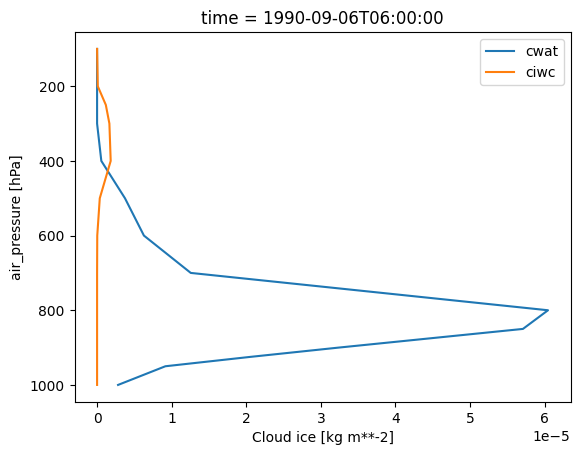

In [6]:
ds_pl.mean(dim=["x", "y"], keep_attrs=True).isel(time=42).cwat.plot(yincrease=False, y="pressure", label="cwat")
ds_pl.mean(dim=["x", "y"], keep_attrs=True).isel(time=42).ciwc.plot(yincrease=False, y="pressure", label="ciwc")
plt.gca().legend()

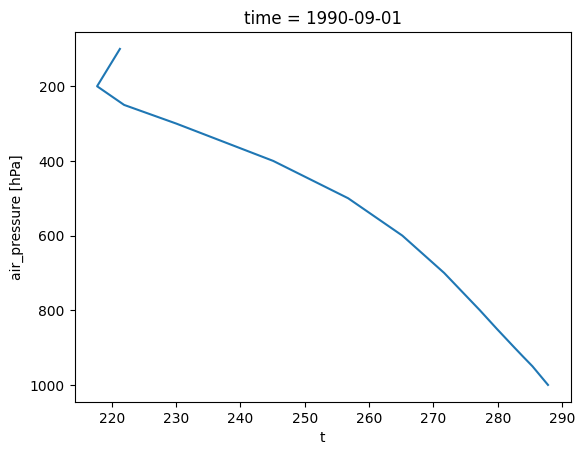

In [7]:
ds_pl.mean(dim=["x", "y"]).isel(time=0).t.plot(yincrease=False, y="pressure")

In [8]:
# selecting a variable, level and a time-subset
da_t = ds_pl.t.sel(time=slice("1990-09-15T06:00:00", "1990-09-15T16:00:00"), pressure=1000)

da_t

<xarray.DataArray 't' (time: 4, y: 589, x: 789)>
dask.array<getitem, shape=(4, 589, 789), dtype=float64, chunksize=(4, 295, 263), chunktype=numpy.ndarray>
Coordinates:
    lat       (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
    pressure  int64 1000
  * time      (time) datetime64[ns] 1990-09-15T06:00:00 ... 1990-09-15T15:00:00
  * x         (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y         (y) float64 -6.095e+05 -6.07e+05 -6.045e+05 ... 8.58e+05 8.605e+05
Attributes:
    data_kind:         ANALYSIS
    grid_mapping:      danra_projection
    level_type:        isobaricInhPa
    long_name:         Temperature
    paramId:           233253011
    shortName:         t
    standard_name:     air_temperature
    stepType:          instant
    stepUnits:         1
    typeOfLevel:       isobaricInhPa
    units:             K
    uvRelativeToGrid:  1

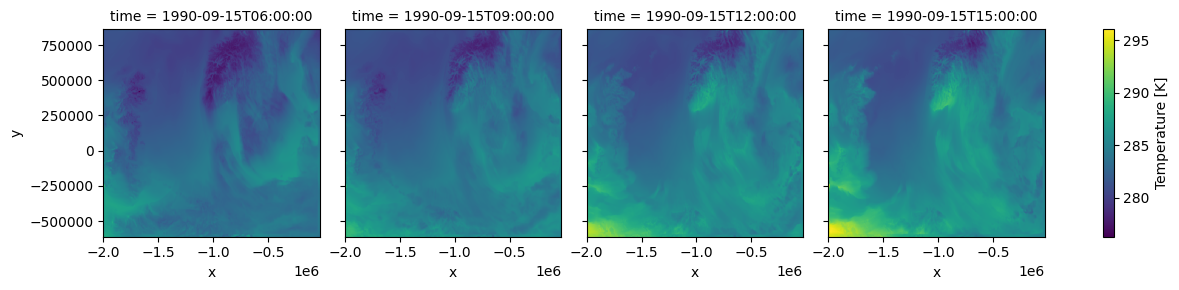

In [9]:
da_t.plot(col="time", col_wrap=4)

/tmp/ipykernel_2168730/3270564148.py:5: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flatten():


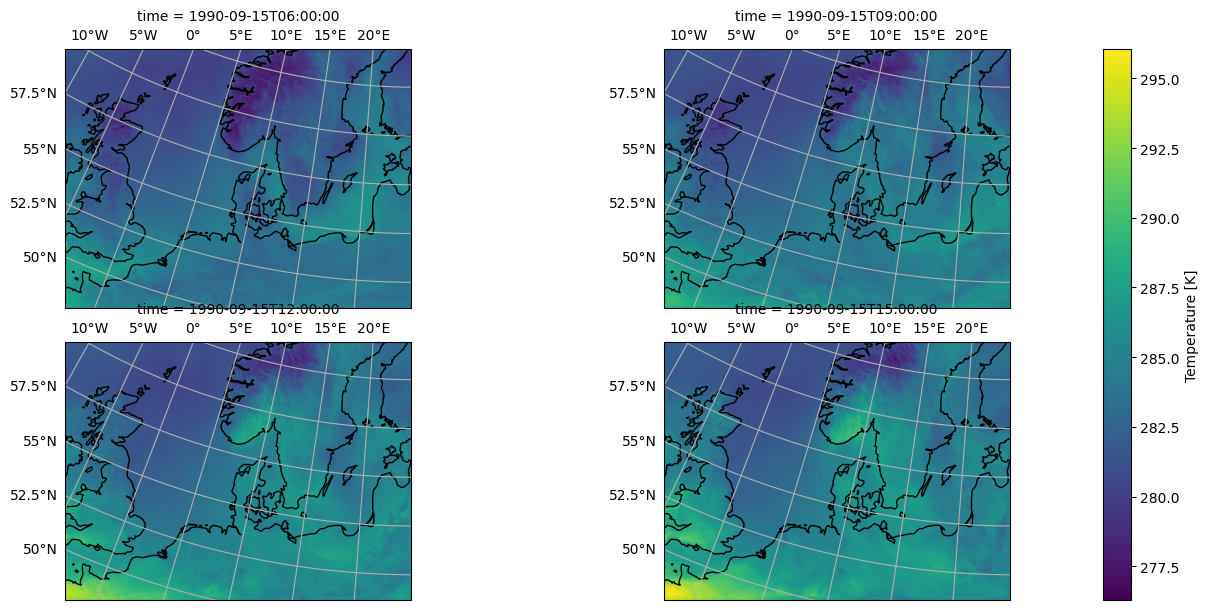

In [10]:
# the same but plotted on a map
data_crs = ccrs.Projection(ds_pl.danra_projection.crs_wkt)
map_crs = data_crs
g = da_t.plot(col_wrap=2, col="time", transform=data_crs, subplot_kws=dict(projection=map_crs), aspect=3.0)
for ax in g.axes.flatten():
    ax.gridlines(draw_labels=["top", "left"])
    ax.coastlines()

# Looking at height-level data

In [11]:
import xarray as xr
ds_hl = xr.open_zarr(fp_root / "height_levels.zarr")
ds_hl

<xarray.Dataset>
Dimensions:           (altitude: 9, y: 589, x: 789, time: 96768)
Coordinates:
  * altitude          (altitude) int64 30 50 75 100 150 200 250 300 500
    lat               (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
    lon               (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
  * time              (time) datetime64[ns] 1990-09-01 ... 2023-10-13T21:00:00
  * x                 (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                 (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables:
    danra_projection  float64 ...
    r                 (time, altitude, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    t                 (time, altitude, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    u                 (time, altitude, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
    v                 (time, altitude, y, x) float64 dask.array<chunksize=(256, 1, 295, 263), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    contact:      Leif Denby <lcd@dmi.dk>, Danish Meteorological Institute
    description:  All prognostic variables for 1990-09-01T00:00Z to 2024-01-0...
    license:      CC-BY-4.0: https://creativecommons.org/licenses/by/4.0/

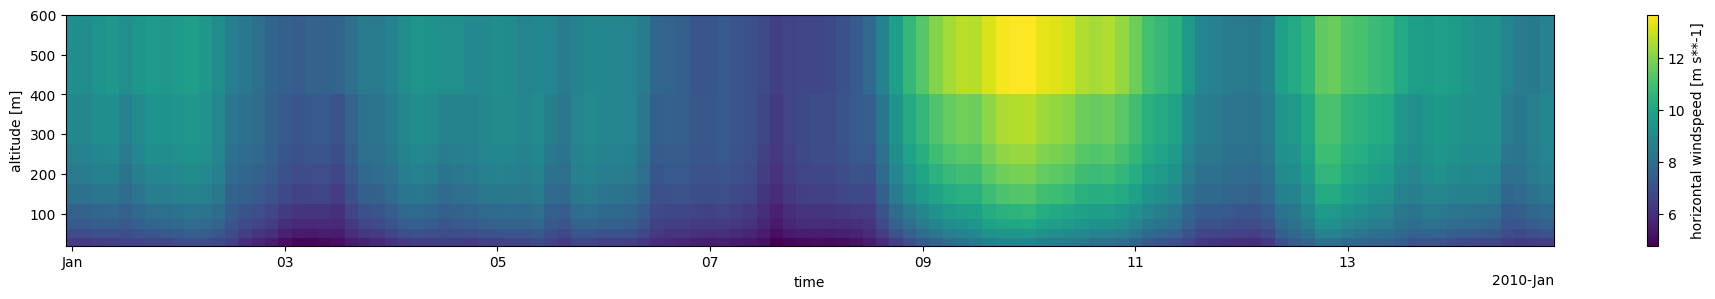

In [12]:
da_windspeed = np.sqrt(ds_hl.u**2.0 + ds_hl.v**2.0)
da_windspeed.attrs["units"] = ds_hl.u.units
da_windspeed.attrs["long_name"] = "horizontal windspeed"
da_windspeed.mean(dim=["x","y"], keep_attrs=True).sel(time=slice("2010-01-01", "2010-01-14")).plot(y="altitude", aspect=8.0, size=3.0)

/tmp/ipykernel_2168730/2552008063.py:8: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flatten():


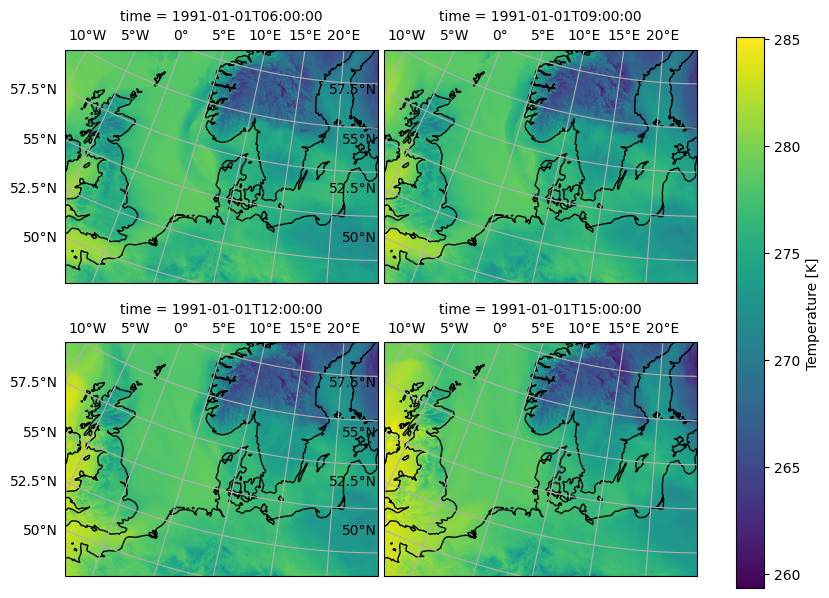

In [13]:
data_crs = ccrs.Projection(ds_hl.danra_projection.crs_wkt)
map_crs = data_crs

g = ds_hl.t.sel(
    time=slice("1991-01-01T06:00", "1991-01-01T15:00"), altitude=100).plot(
    col_wrap=2, col="time", transform=data_crs, subplot_kws=dict(projection=map_crs), aspect=1.2
)
for ax in g.axes.flatten():
    ax.gridlines(draw_labels=["top", "left"])
    ax.coastlines()

# Looking at single-level data

In [14]:
ds_sl = xr.open_zarr(fp_root / "single_levels.zarr")
ds_sl

<xarray.Dataset>
Dimensions:           (time: 96768, y: 589, x: 789)
Coordinates:
    lat               (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
    lon               (y, x) float64 dask.array<chunksize=(295, 263), meta=np.ndarray>
  * time              (time) datetime64[ns] 1990-09-01 ... 2023-10-13T21:00:00
  * x                 (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                 (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables: (12/31)
    cape_column       (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    cb_column         (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    ct_column         (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    danra_projection  float64 ...
    grpl_column       (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    hcc0m             (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    ...                ...
    t2m               (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    tcc0m             (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    u10m              (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    v10m              (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    vis0m             (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
    xhail0m           (time, y, x) float64 dask.array<chunksize=(256, 295, 263), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    contact:      Leif Denby <lcd@dmi.dk>, Danish Meteorological Institute
    description:  All prognostic variables for 1990-09-01T00:00Z to 2024-01-0...
    license:      CC-BY-4.0: https://creativecommons.org/licenses/by/4.0/

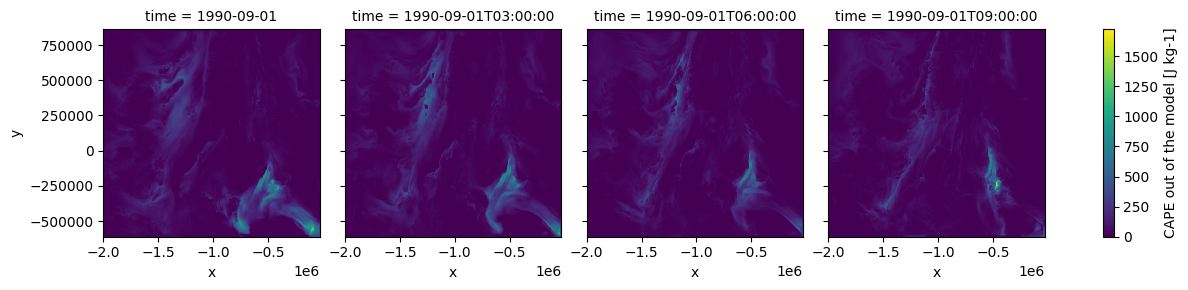

In [15]:
ds_sl.cape_column.isel(time=slice(0, 4)).plot(col="time")